In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [17]:
df = pd.read_parquet("database_dpe.parquet")
fig_surface = px.histogram(df, x='surface_habitable_logement', nbins=50, title='Distribution de la surface habitable')
plot_div = fig_surface.to_html(full_html=False)
fig_surface.show()

In [18]:
df.head()

,code_departement_insee,type_batiment_dpe,annee_construction_dpe,surface_habitable_logement,type_energie_chauffage,type_vitrage,classe_dpe,conso_energies_primaires_m2,emission_ges_m2
0,14,appartement,1910.0,10,electricite,double vitrage,A,33.843508,6.693366
1,14,appartement,1910.0,10,electricite,simple vitrage,A,33.843508,6.693366
2,14,appartement,1910.0,30,electricite,simple vitrage,A,33.843508,6.693366
3,14,appartement,1910.0,40,electricite,simple vitrage,A,33.843508,6.693366
4,14,appartement,1920.0,30,gaz,double vitrage,A,33.843508,6.693366


In [22]:
df[df["classe_dpe"]=="C"].conso_energies_primaires_m2.mean()

129.54529796596788

In [65]:
{'type_batiment_dpe': 'maison', 
'surface_habitable_logement': 130, 
'annee_construction_dpe': 1980, 
'type_vitrage': 'simple vitrage', 
'type_energie_chauffage': 'gaz', 
'code_departement_insee': '76', 
'classe_dpe': 'D'}

{'type_batiment_dpe': 'maison',
 'surface_habitable_logement': 130,
 'annee_construction_dpe': 1980,
 'type_vitrage': 'simple vitrage',
 'type_energie_chauffage': 'gaz',
 'code_departement_insee': '76',
 'classe_dpe': 'D'}

In [66]:
filtered_df = df[(df['code_departement_insee'] == "76") & (df['type_batiment_dpe'] == "maison") & (df['annee_construction_dpe'] == 1980) 
                 & (df['surface_habitable_logement'] == 125) & (df['type_energie_chauffage'] == "gaz") & (df['type_vitrage'] == "simple vitrage")]  
filtered_df

,code_departement_insee,type_batiment_dpe,annee_construction_dpe,surface_habitable_logement,type_energie_chauffage,type_vitrage,classe_dpe,conso_energies_primaires_m2,emission_ges_m2
19652,76,maison,1980.0,125,gaz,simple vitrage,D,177.275,34.43


In [60]:
df_grp = filtered_df.groupby(['classe_dpe'], as_index=False)['conso_energies_primaires_m2'].agg('mean')
df_grp

,classe_dpe,conso_energies_primaires_m2
0,C,140.50000
1,D,192.70000
2,E,300.09889


<Axes: xlabel='conso_energies_primaires_m2', ylabel='classe_dpe'>

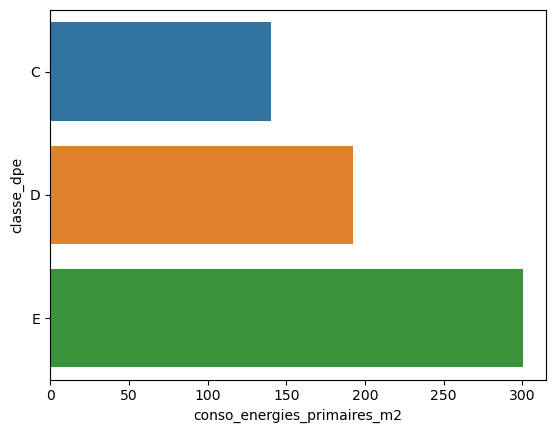

In [61]:
sns.barplot(x = "conso_energies_primaires_m2", y = 'classe_dpe', data = df_grp ,orient='h')

In [23]:
df_grp.code_departement_insee

classe_dpe
A    1414141414141414141414141414141414141414141414...
B    1414141414141414141414141414141414141414141414...
C    1414141414141414141414141414141414141414141414...
D    1414141414141414141414141414141414141414141414...
E    1414141414141414141414141414141414141414141414...
F    1414141414141414141414141414141414141414141414...
G    1414141414141414141414141414141414141414141414...
Name: code_departement_insee, dtype: object

In [74]:
fig = px.bar(df_grp, x="conso_energies_primaires_m2", y="classe_dpe", orientation='h', template="ggplot2")
fig.show()

In [6]:
list_dpe = ["A", "B", "C", "D", "E", "F", "G"]

In [12]:
list_dpe[list_dpe.index("C") - 1]

'B'

In [11]:
list_dpe.index("C")

2